# Discovering Decision-Making Styles with Unsupervised Learning

## Section 1: Problem Framing and Research Question

### 1.1 Motivation

In many real-world problems, we do not have labeled data that tells us the “correct” category for each observation.
Despite this, we often suspect that structure exists beneath the surface.

Human decision-making is a good example.
People differ in how quickly they decide, how much risk they tolerate, how much information they seek, and how consistently they behave. These differences are observable, but the underlying “decision styles” are rarely labeled.

Unsupervised learning provides tools for exploring such structure without predefined answers.
Rather than predicting outcomes, the goal is to discover patterns based on similarity.

Clustering is one of the most common approaches used for this purpose.

### 1.2 Research Question

This project investigates the following question:

> Can unsupervised clustering methods recover meaningful decision-making styles using behavioral data alone, without labels?

This question emphasizes understanding over performance.
There is no ground truth provided to the model, and no accuracy score to optimize.

Instead, the focus is on:

- How clusters form

- What assumptions the algorithms make

- How interpretation shapes conclusions

### 1.3: Why Clustering Is an Apropriate Tool

Clustering methods are designed for situations where:

- Labels are unavailable or unreliable
- Similarity between observations is meaningful
- The goal is exploration rather than prediction

In this project:

- Each data point represents an individual
- Each feature represents a behavioral trait
- Similar individuals should appear closer in feature space

Clustering allows us to group individuals based on these similarities and examine whether the resulting groups correspond to intuitive or interpretable decision-making styles.

Importantly, clustering does not guarantee meaningful results.
Any structure discovered must be **examined, interpreted, and questioned**.

This notebook treats clustering as a tool for reasoning, not a source of truth.

### 1.4 Project Scope

This project is intentionally limited in scope to support learning:

- Synthetic data is used to maintain full control over assumptions
- Simple clustering algorithms are chosen to emphasize intuition
- Visualization and interpretation are prioritized over metrics

The goal is not to build a production model, but to **understand what clustering does and why it behaves the way it does**.

## Section 2: Synthetic Data Design

### 2.1 Why Use Synthetic Data

For this project, synthetic data is used instead of a standard public dataset.

The purpose of this choice is not convenience, but control.

By generating the data ourselves, we are able to:

- Define clear behavioral assumptions
- Introduce realistic noise and overlap
- Know whether meaningful structure exists *without revealing it to the model*

This allows us to separate two questions:

1. Does structure exist in the data?
2. Can clustering methods recover that structure?

### 2.2 Conceptualizing Behavioral Features

Each row in the dataset represents an individual.
Each column represents a measurable aspect of decision-making behavior.

The features are designed to be **interpretable**, not optimal.

#### **Behavioral Features**
- **Risk Tolerance**
  Represents how willing an individual is to accept uncertain outcomes.
  Higher values indicate a stronger preference for high-risk, high-reward choices.
- **Decision Speed**
  Measures how quickly decisions are made.
  Lower values correspond to faster decision-making, while higher values indicate deliberation.
- **Information Seeking**
  Captures how much information an individual typically gathers before deciding.
  This can be thought of as the number of sources consulted or options evaluated.
- **Consistency**
  Reflects how stable an individual’s decisions are across similar situations.
  Lower consistency suggests variability or impulsiveness.
- **Reward Sensitivity**
  Represents how strongly outcomes influence future decisions.
  Higher values indicate stronger reinforcement effects.

Each feature is designed to capture a different dimension of behavior, reducing redundancy while preserving interpretability.

### 2.3 Hidden Behavioral Archetypes

During data generation, individuals are drawn from a small number of **behavioral archetypes**.

These archetypes are **not labels** used by the clustering algorithms.
They exist only to shape the data-generating process.

Examples of such archetypes include:

- **Fast Risk-Oriented Decision Makers**
  High risk tolerance, fast decisions, limited information seeking.

- **Deliberate and Cautious Planners**
  Low risk tolerance, slow decisions, extensive information gathering.

- **Exploratory but Inconsistent Individuals**
  Moderate risk tolerance, variable decision speed, low consistency.

These archetypes are intentionally overlapping.
Real human behavior rarely forms clean, separable groups.

The clustering algorithms will not be informed of these archetypes.
Their purpose is to test whether structure can be inferred from observed behavior alone.

### 2.4 Design Principles and Assumptions

Several assumptions guide the dataset design:

- Behavioral traits are continuous rather than categorical
- Noise is an inherent part of behavioral measurement
- No single feature should perfectly define a cluster
- Clusters may overlap in some dimensions but separate in others

These assumptions reflect the complexity of real-world data and prevent the clustering task from becoming trivial.

## Section 3: Data Generation

### 3.1 Import Required Libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 3.2 Setting Random Seed

Synthetic data relies on randomness.

To ensure results are reproducible, we fix a random seed.

In [37]:
np.random.seed(42)

This ensures that:
- Anyone running this notebook gets the same dataset
- Clustering results can be discussed consistently

### 3.3 Defining the Size of Each Archetype

We now decide how many individuals belong to each hidden archetype

In [38]:
n_fast_risk = 150
n_cautious = 150
n_exploratory = 150

The groups are intentionally balanced to:
- Avoid trivial dominance by one grroup
- Focus attention on behavior, not sample size effects

### 3.4 Generating Archetype 1: Fast Risk-Oriented Decision Makers

This group is characterized by:
- High risk tolerance
- Fast decisions
- Low information seeking
- Moderate consistency
- High reward sensitivity

In [39]:
fast_risk = pd.DataFrame({
    "risk_tolerance": np.random.normal(loc=75, scale=8, size=n_fast_risk),
    "decision_speed": np.random.normal(loc=20, scale=5, size=n_fast_risk),
    "information_seeking": np.random.normal(loc=25, scale=6, size=n_fast_risk),
    "consistency": np.random.normal(loc=55, scale=10, size=n_fast_risk),
    "reward_sensitivity": np.random.normal(loc=70, scale=7, size=n_fast_risk)
})

Each feature is drawn from a distribution, not assigned a fixed value.

This introduces natural variation within the archetype.

### 3.5 Generating Archetype 2: Deliberate and Cautious Planners

This group is characterized by:
- Low risk tolerance
- Slow decisions
- High information seeking
- High consistency
- Moderate reward sensitivity

In [40]:
cautious = pd.DataFrame({
    "risk_tolerance": np.random.normal(loc=30, scale=7, size=n_cautious),
    "decision_speed": np.random.normal(loc=65, scale=8, size=n_cautious),
    "information_seeking": np.random.normal(loc=70, scale=8, size=n_cautious),
    "consistency": np.random.normal(loc=75, scale=6, size=n_cautious),
    "reward_sensitivity": np.random.normal(loc=45, scale=7, size=n_cautious)
})

We make some features contrast strongly with the first archetype and others partially overlap, making clustering non-trivial

### 3.6 Generating Archetype 3: Exploratory but Inconsistent Individuals

This group represents variability and uncertainty:
- Moderate risk tolerance
- Variable decision speed
- Moderate information seeking
- Low consistency
- Moderate reward sensitivity

In [41]:
exploratory = pd.DataFrame({
    "risk_tolerance": np.random.normal(loc=50, scale=12, size=n_exploratory),
    "decision_speed": np.random.normal(loc=45, scale=15, size=n_exploratory),
    "information_seeking": np.random.normal(loc=50, scale=12, size=n_exploratory),
    "consistency": np.random.normal(loc=35, scale=12, size=n_exploratory),
    "reward_sensitivity": np.random.normal(loc=50, scale=10, size=n_exploratory)
})

### 3.7 Combining and Shuffling the Dataset

We now combine all individuals into a single dataset.

In [42]:
data =pd.concat([fast_risk, cautious, exploratory], ignore_index=True)

We shuffle the data to remove any ordering effects.

In [43]:
data = data.sample(frac=1).reset_index(drop=True)

### 3.8 Inspecting the Final Dataset

We examine what we have created.

In [44]:
data.shape

(450, 5)

In [45]:
data.head()

,risk_tolerance,decision_speed,information_seeking,consistency,reward_sensitivity
0,67.724900,12.820689,35.532045,71.764373,58.028821
1,38.019375,29.995030,65.188494,34.681745,33.990960
2,26.062733,56.787878,73.816327,76.858924,56.981959
3,32.740664,70.425766,58.974923,49.833569,43.524582
4,37.709758,57.609300,47.466437,32.661101,24.376663


In [46]:
data.describe()

,risk_tolerance,decision_speed,information_seeking,consistency,reward_sensitivity
count,450.000000,450.000000,450.000000,450.000000,450.000000
mean,51.955345,44.167925,48.544513,54.593515,55.314119
std,19.884835,21.032972,20.546415,19.033386,13.183735
min,14.943794,3.793663,12.256626,-1.234146,24.376663
25%,34.346696,22.876236,28.739004,40.731586,45.242916
50%,49.319128,46.091144,48.878293,54.134449,53.612057
75%,70.830858,63.528581,67.353707,71.742897,66.215268
max,94.705937,82.306038,89.518019,90.478256,88.013519


In [47]:
data.isnull().sum()

risk_tolerance         0
decision_speed         0
information_seeking    0
consistency            0
reward_sensitivity     0
dtype: int64

## Section 4: Exploratory Data Analysis (EDA)

### 4.1 Why Exploratory Analysis Matters

Before applying any clustering algorithm, it is essential to understand the data’s basic structure.

Clustering methods rely entirely on:

- Distances between points

- Relative feature scales

- Patterns of variation

If these elements are misunderstood, clustering results can appear meaningful while being misleading.

EDA helps answer simple but critical questions:

- What ranges do the features take?

- How much variability exists?

- Where might overlap occur?

### 4.2 Overview of Feature Distriutions

We begin by visualizing the distriution of each feature independently.

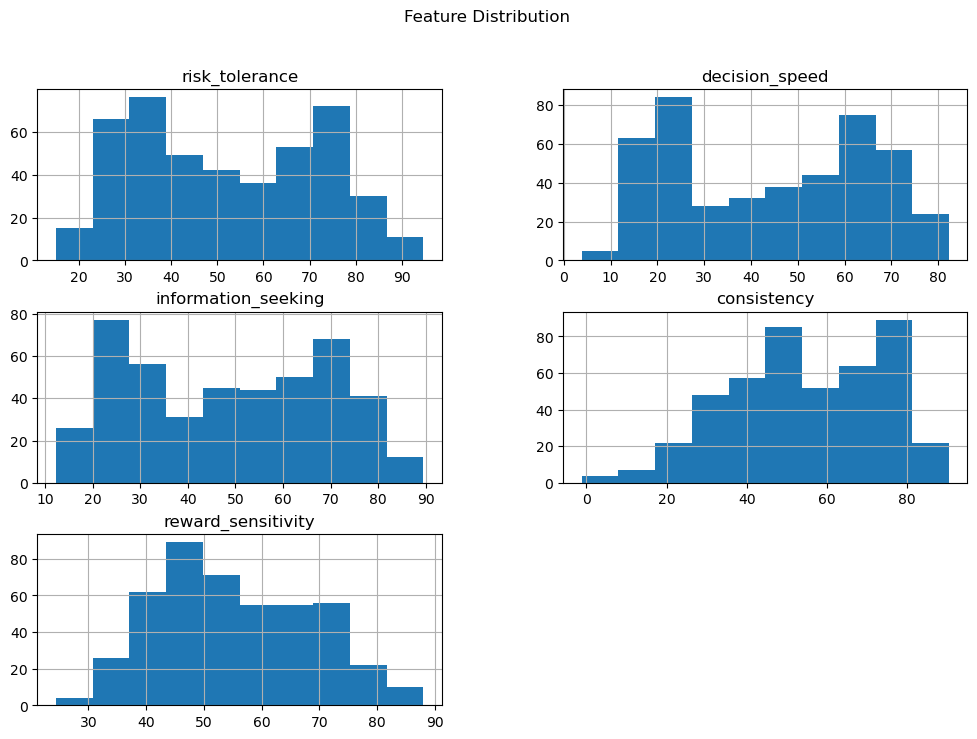

In [48]:
data.hist(bins=10, figsize=(12,8))
plt.suptitle("Feature Distribution", y=0.98)
plt.show()

Across all features, the distributions show **substantial variability and evidence of multiple underlying subpopulations** rather than a single homogeneous group.

Several features (risk tolerance, decision speed, and information seeking) display multimodal patterns, suggesting that individuals differ meaningfully along these behavioral dimensions. However, the overlap between modes indicates that **no single feature can define clusters on its own**.

Other features, such as consistency and reward sensitivity, exhibit broader or smoother distributions. These features are less likely to drive cluster separation independently but may **refine and stabilize cluster assignments** when combined with more discriminative variables.

Overall, the feature distributions suggest that:
- Latent structure is present in the data
- Separation is partial rather than clean
- Meaningful clustering will depend on **joint relationships between features**, not marginal distributions

This reinforces the need for multivariate, distance-based clustering methods and careful interpretation of results.

### 4.3 Summary Statistics Revisited

In [49]:
data.describe()

,risk_tolerance,decision_speed,information_seeking,consistency,reward_sensitivity
count,450.000000,450.000000,450.000000,450.000000,450.000000
mean,51.955345,44.167925,48.544513,54.593515,55.314119
std,19.884835,21.032972,20.546415,19.033386,13.183735
min,14.943794,3.793663,12.256626,-1.234146,24.376663
25%,34.346696,22.876236,28.739004,40.731586,45.242916
50%,49.319128,46.091144,48.878293,54.134449,53.612057
75%,70.830858,63.528581,67.353707,71.742897,66.215268
max,94.705937,82.306038,89.518019,90.478256,88.013519


The summary statistics indicate that all features span **wide ranges with substantial variability**, confirming that the dataset captures diverse behavioral profiles rather than a narrow or homogeneous population.

While the means of most features fall near the center of their respective ranges, these averages are **not representative of any specific group**. In a clustering context, the mean does not correspond to a cluster center but instead reflects an aggregate across potentially distinct subpopulations.

The relatively high standard deviations across features suggest **significant overlap between individuals**, implying that cluster boundaries are likely to be soft rather than sharply defined. Additionally, differences in scale are evident: decision speed and information seeking exhibit broader spreads than reward sensitivity, while consistency includes extreme values that may influence distance calculations.

Overall, these statistics reinforce that clustering should focus on **relative proximity between observations**, not central tendencies. They also motivate the need for feature scaling prior to applying distance-based clustering methods, as unscaled features would disproportionately influence the geometry of the solution.

### 4.4 Pairwise Feature Relationships

We explore how features interact with one another.

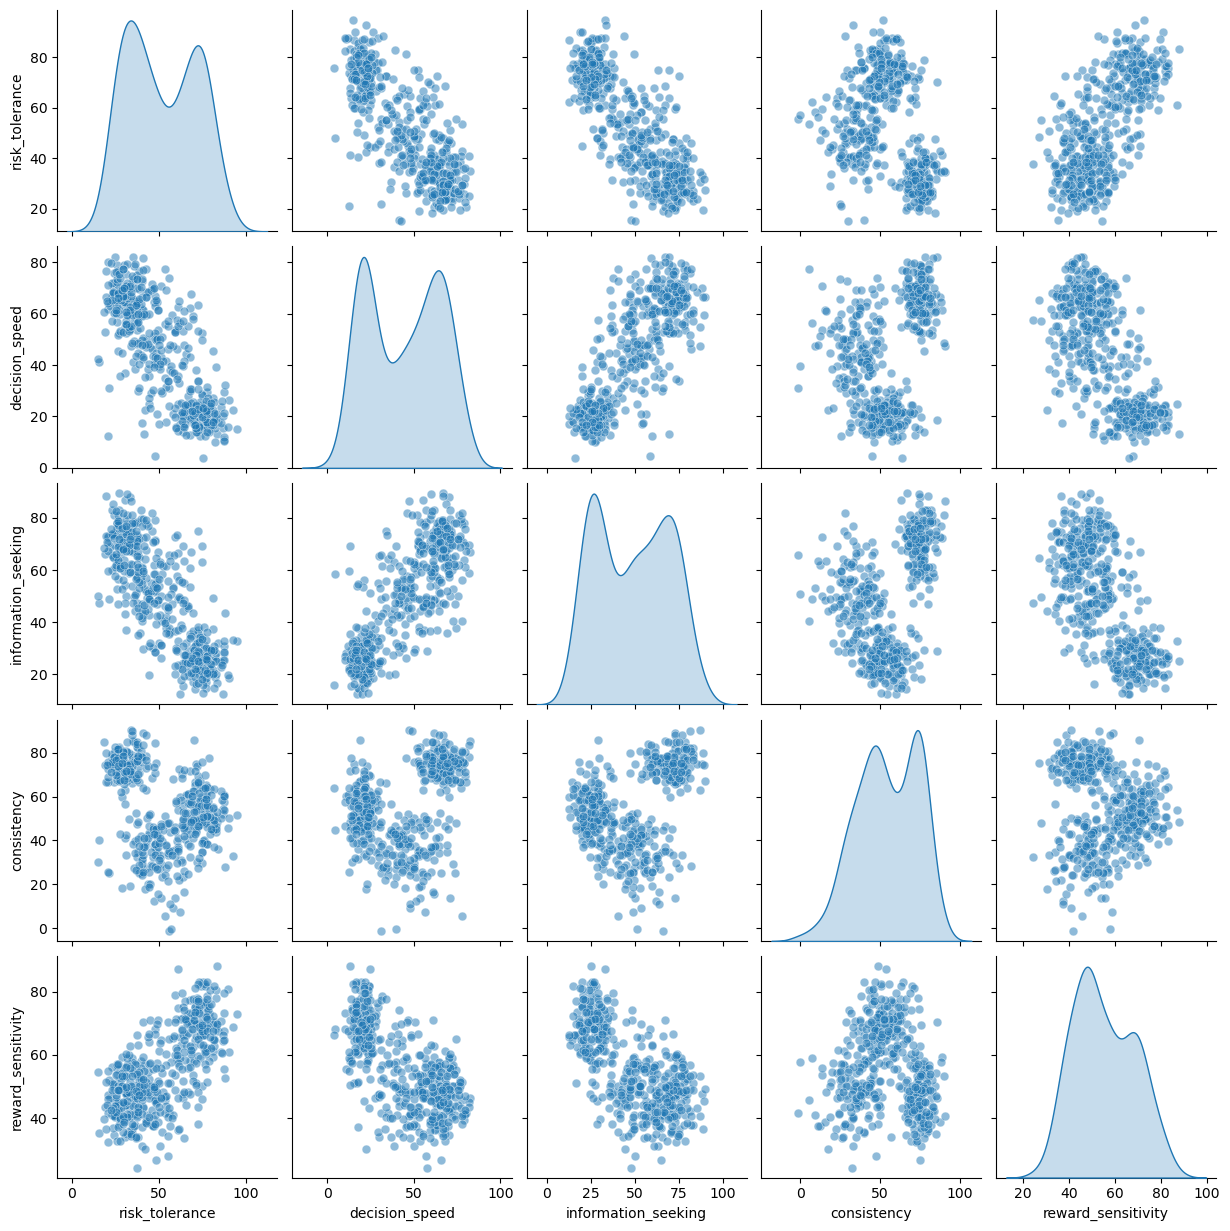

In [50]:
sns.pairplot(
    data,
    diag_kind="kde",
    plot_kws={"alpha": 0.5, "s":40}
)
plt.show()

The pairwise feature analysis reveals that the data contains **structured but overlapping behavioral patterns** rather than cleanly separable groups. Most features exhibit multimodal distributions, indicating the presence of latent subpopulations, while substantial overlap suggests that these subgroups are not sharply defined.

Several features interact in systematic ways. Risk tolerance shows strong relationships with multiple variables, particularly decision speed and reward sensitivity, suggesting it plays a central role in organizing behavior. Information seeking also emerges as an important differentiating dimension, especially in relation to consistency, helping separate deliberate planners from more impulsive or exploratory individuals.

Importantly, the observed clusters are elongated, overlapping, and uneven in density. This implies that cluster structure is **multidimensional and geometric**, rather than driven by any single feature. As a result, clustering outcomes will depend heavily on how distances are measured and scaled, and should be interpreted as probabilistic groupings rather than definitive categories.

Overall, the pairwise relationships confirm that meaningful structure exists in the data, while also highlighting the need for careful preprocessing and cautious interpretation in downstream clustering analysis.

### 4.5 Focused Scatter Plots (Interpretive View)

We inspect a few mwaningful feature pairs.

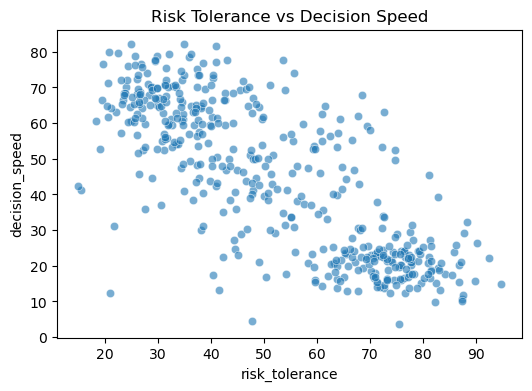

In [51]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x="risk_tolerance",
    y="decision_speed",
    data=data,
    alpha=0.6
)
plt.title("Risk Tolerance vs Decision Speed")
plt.show()

There is a clear negative relationship: as risk tolerance increases, decision speed decreases.

Three dense regions are visible:
- High risk tolerance + fast decisions
- Low risk tolerance + slow decisions
- A middle group with moderate risk and mixed speeds
  
The clusters are not perfectly separated; there is visible overlap between groups.

This plot suggests that decision speed is strongly informative when combined with risk tolerance, but neither feature alone is sufficient.

The presence of overlap means clustering will require multidimensional distance, not simple threshold rules.

This structure is well suited for distance-based clustering, but we should expect soft boundaries, not crisp splits.

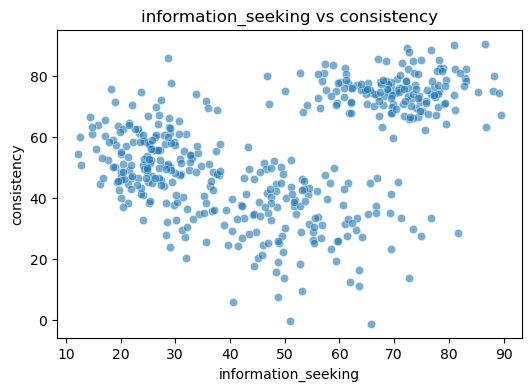

In [52]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x="information_seeking",
    y="consistency",
    data=data,
    alpha=0.6
)
plt.title("information_seeking vs consistency")
plt.show()

We observe a positive relationship between information seeking and consistency.

Two dense regions are visible:
- High information seeking + high consistency
- Low information seeking + moderate consistency

We also observe a scatterd middle group with low consistency.

This relationship suggests that planning-oriented individuals cluster naturally in this space.

The noisy middle region hints at exploratory behavior.

This plot supports the idea that clusters will differ in behavioral coherence, not just averages.

>The data shows structured variability without clean separation.

## Section 5: Distance and Feature Scaling

### 5.1 Why Distance Is Central to Clustering

Most clustering algorithms operate by measuring distance between data points.

In our dataset, each individual is represented as a point in a five-dimensional space and each feature defines ine axis of that space. So, similar individuals are expected to lie closer together.

Clustering is an attempt to group points that are geometrically close. However, distance calculations are sensitive to how features are measured.

### 5.2 Standardizing the Features

To prevent any single feature from dominating distance calculations, we standardize the dataset.

This prevents relative differences while equalizing scale.

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [54]:
scaled_data

array([[ 0.79392694, -1.49204418, -0.63402546,  0.9031482 ,  0.20614213],
       [-0.70161407, -0.6745917 ,  0.81096899, -1.04731398, -1.61918385],
       [-1.30357779,  0.60067584,  1.23135547,  1.17111004,  0.1266482 ],
       ...,
       [-0.5498683 , -0.04634276,  0.54499216, -1.51198562, -0.21634555],
       [-1.11114164,  1.22516525,  0.66005847,  0.69157163, -1.25495225],
       [ 1.18781055, -0.99275008, -1.74335658, -0.19705185,  0.59512678]])

In [55]:
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
scaled_df.describe()

,risk_tolerance,decision_speed,information_seeking,consistency,reward_sensitivity
count,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02
mean,1.184238e-16,1.973730e-16,1.657933e-16,3.552714e-16,1.578984e-17
std,1.001113e+00,1.001113e+00,1.001113e+00,1.001113e+00,1.001113e+00
min,-1.863367e+00,-1.921706e+00,-1.768108e+00,-2.936408e+00,-2.349250e+00
25%,-8.865171e-01,-1.013427e+00,-9.650127e-01,-7.291061e-01,-7.647614e-01
50%,-1.327218e-01,9.154004e-02,1.626328e-02,-2.414584e-02,-1.292468e-01
75%,9.502981e-01,9.215152e-01,9.164678e-01,9.020186e-01,8.277837e-01
max,2.152302e+00,1.815272e+00,1.996412e+00,1.887456e+00,2.483044e+00


### 5.3: Visual Comparison: Before vs After Scaling

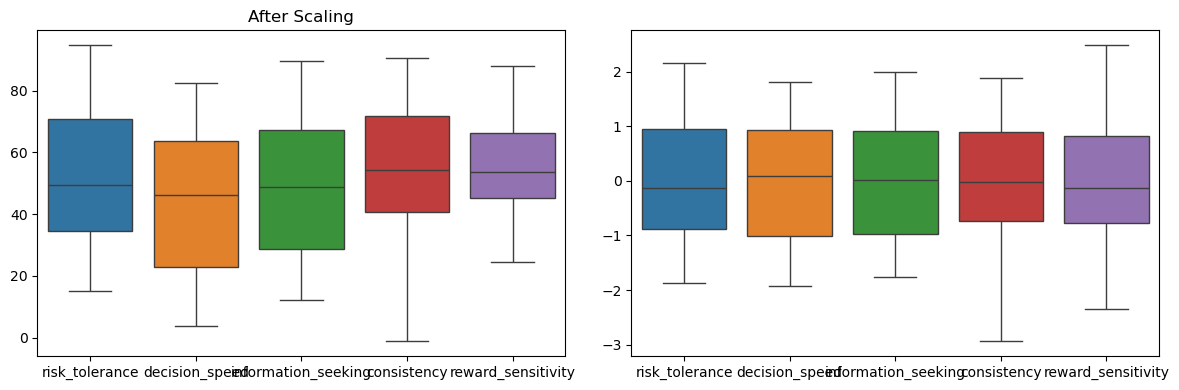

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.boxplot(data=data, ax=axes[0])
axes[0].set_title("Before Scaling")

sns.boxplot(data=scaled_df, ax=axes[1])
axes[0].set_title("After Scaling")

plt.tight_layout()
plt.show()

This visualization shows:

- Original differences in scale

- Standardized alignment after scaling

The structure remains, but the geometry changes.

## Section 6: K-Means Clustering

### 6.1 What K-Means Actually Does

K-Means attempts to partition data into **K clusters** by minimizing within-cluster variance.

It minimizes the sum of squared distance between
- Each point
- And the centroid (mean) of the cluster it belongs to

This objective is called inertia

Here are some important implications/assumptions:
- Clusters are assumed to be roughly spherical
- Clusters are assumed to be similar in size
- Distance is Euclidean by default

### 6.2 Choosing an initial K

We must decide how many clusters (k) to request. We begin nwith an exploratory approach using the **Elbow Method**.

The idea here is to:
- Fit models with increasing K
- Track inertia
- Look for diminishing returns

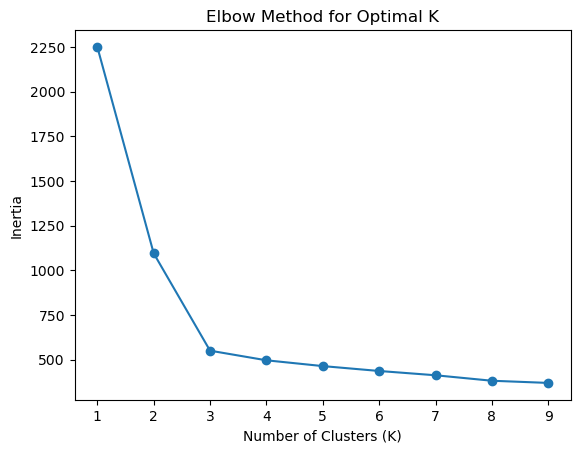

In [57]:
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')

inertia_values = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia_values, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

K = 3 appears to be a reasonable compromise.

### 6.3 Fitting K-Means with K = 3

In [58]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

data["KMeans_Cluster"] = clusters

Now, each individual has a cluster label.

### 6.4 Visualizing Clusters (2D Projection)

Since our data is 5-dimensional, we visualize clusters using two features at a time.

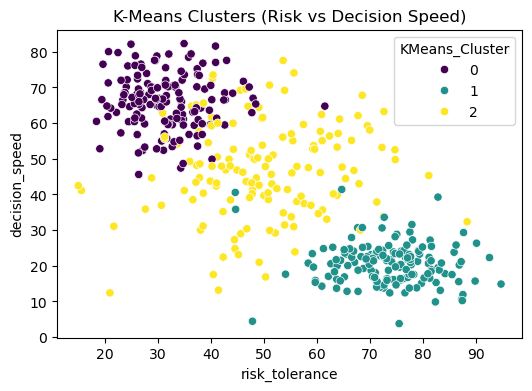

In [59]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x=data["risk_tolerance"],
    y=data["decision_speed"],
    hue=data["KMeans_Cluster"],
    palette="viridis"
)
plt.title("K-Means Clusters (Risk vs Decision Speed)")
plt.show()

The clusters align with previously observed patterns.

Our K-Means result shows three distinct behavioral regions:

- Cluster 1 (low risk, slow decisions): Cautious and deliberate individuals. Compact and well-separated.

- Cluster 2 (high risk, fast decisions):
Impulsive and risk-tolerant individuals. Very tight grouping. K-Means handles this region especially well.

- Cluster 3 (moderate everything):
A middle band that bridges the extremes. More spread out and slightly elongated.


The synthetic data successfully contains latent structure, showing that K-Means can recover that structure reasonably well.
But the quality of recovery depends on geometry.

The visualization is only a 2D slice of a 5D clustering process. So, apparent separation here may hide overlap elsewhere.

>The model is behaving as expected, the data contains meaningful structure, and the algorithm’s assumptions visibly shape the result.

### 6.5 Inspecting Cluster Centers

Cluster centers represent the average standardized position of each group.

In [60]:
centers = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=data.columns[:-1]
)

centers

,risk_tolerance,decision_speed,information_seeking,consistency,reward_sensitivity
0,-1.024556,1.041132,1.064009,1.069205,-0.691114
1,1.087303,-1.119318,-1.100585,-0.044943,1.088024
2,-0.097794,0.115222,0.070154,-1.095127,-0.455510


These values are in standardized space.

To interpret in original units:

In [61]:
original_centers = scaler.inverse_transform(kmeans.cluster_centers_)
pd.DataFrame(original_centers, columns=data.columns[:-1])

,risk_tolerance,decision_speed,information_seeking,consistency,reward_sensitivity
0,31.604857,66.041673,70.381783,74.921485,46.212780
1,73.552158,20.651521,25.956573,53.739048,69.642394
2,50.012889,46.588694,49.984327,33.772710,49.315477


### 6.6 Interpreting the Clusters

Based on feature averages, we may observe patterns such as:

Cluster A:

- High risk tolerance

- Fast decisions

- Lower information seeking

Cluster B:

- Low risk tolerance

- Slow decisions

- High information seeking

Cluster C:

- Moderate values across features

Important:
These labels are interpretations.
K-Means only minimizes distance.

### 6.7 Limitations of K-Means in This Context

Based on our earlier visualizations:
- Clusters may be elongated

- Densities may differ

- Boundaries may not be spherical

K-Means may:

- Split natural groups

- Merge distinct subgroups

- Be sensitive to initialization

## Section 7: Hierarchical Clustering and Dendrograms

### 7.1 Overview

Hierarchical clustering builds clusters step by step.

There are two main approaches:
- Agglomerative which operates from the bottom-up and starts with every point as its own cluster, itiratively merging the closest clusters.
- Dvisive (top-down): Starts with one cluster and recursively splits it.

We'll use **Agglomerative Clustering**.

Unlike K-Means, we do not specify K at the beginning. We construct a full hierarchy and then choose the number of cluster by deciding where to cut the tree.

### 7.2 Linkage: How Clusters Are Merged

When merging clusters, we must define how distance between clusters is computed.

- `Single linkage`: minimum distance between cluster members
- `Complete linkage`: maximum distance
- `Average linkage`: average distance
- `Ward linkage`: minimizes variance within clusters

We'll use **Ward linkage**, because:
- It behaves similarly to K-Means
- It minimizes within cluster variance
- It tends to produce compact clusters

### 7.3 Creating the Dendrogram

A dendrogram is a tree diagram showing how clusters merge.

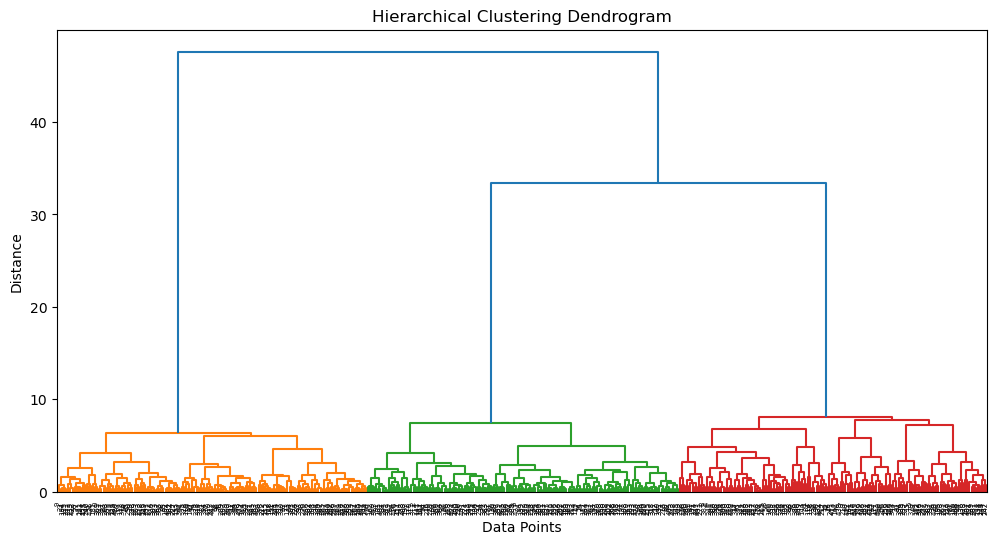

In [62]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(scaled_data, method="ward")

plt.figure(figsize=(12, 6))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

### 7.4 Interpreting the Dendrogram

The dendrogram shows three very clear macro-branches before the final large merges.

What matters is the vertical distance:
- The final merge happens at a much larger height than the merges inside each colored block.
- That big vertical jump indicates that three large clusters were internally cohesive but far apart from each other.

The data truly contains three major structural groups in 5D space.

### 7.5 Choosing a Number of Clusters

The dendrogram suggests 3 clusters. So, we explicitly extract them.

In [63]:
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(
    n_clusters=3,
    linkage="ward"
)

h_clusters = hierarchical.fit_predict(scaled_data)

data["Hierarchical_Cluster"] = h_clusters

Now, each individual has a hierarchical cluster label.

### 7.6 Visualizing Hierarchical CLusters

We compare results using the same 2D projection as before.

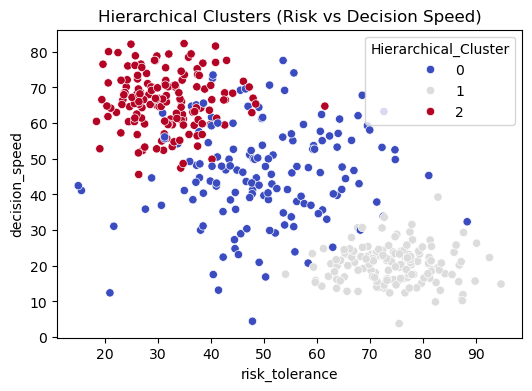

In [64]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x=data["risk_tolerance"],
    y=data["decision_speed"],
    hue=data["Hierarchical_Cluster"],
    palette="coolwarm"
)
plt.title("Hierarchical Clusters (Risk vs Decision Speed)")
plt.show()

Cluster 2 (red):
- Low risk tolerance, high decision speed
- This matches the cautious-deliberate group from K-Means.

Cluster 1 (light grey):
- High risk tolerance, low decision speed
- This matches the impulsive group.

Cluster 0 (blue):
- The moderate band in the middle
- Slightly elongated, transitional behavior.

Key observation:

- The cluster shapes look almost identical to K-Means in this projection.

- Ward linkage minimizes within-cluster variance, just like K-Means does. So visually, they are very similar.

But here’s the subtle insight:

Hierarchical clustering didn’t assume K=3 upfront.
It built the full structure and we cut it at 3 because the dendrogram justified it.

### 7.7 Comparing K-Means and Hierarchical Results

We can examine how consistent the assignments are.

In [65]:
pd.crosstab(data["KMeans_Cluster"], data["Hierarchical_Cluster"])

Hierarchical_Cluster,0,1,2
KMeans_Cluster,,,
0,1,0,151
1,6,150,0
2,142,0,0


This shows us that the two algorithms agree on almost every data point. Only 7 total disagreements out of 300+ observations.
That is extremely high consistency.

This agreement tells us:
- The cluster structure is strong.
- The structure is compact and variance-driven.
- The assumptions of Ward linkage and K-Means are well matched to this dataset.

## Section 8: Evaluating Clustering Quality

In clustering, we cannot compute accuracy since there are no ground-truth labels. Instead, we evaluate how well-separated and cohesive clusters are using internal metrics.

One of the most widely used is the Silhouette Score. It measures how cleanly the geometry separates.


### 8.1 Silhouette Score for K-Means

In [66]:
from sklearn.metrics import silhouette_score

kmeans_silhouette = silhouette_score(
    scaled_data,
    data["KMeans_Cluster"]
)
kmeans_silhouette

0.5108628789991153

This is a reasonable structure

### 8.2 Silhouette Score for Hierarchical Clustering

In [67]:
hierarchical_silhouette = silhouette_score(
    scaled_data,
    data["Hierarchical_Cluster"]
)

hierarchical_silhouette

0.505747472336244

The clusters are:
- Clearly better than random grouping
- Meaningfully separated
- But not perfectly isolated

This aligns perfectly with what we saw visually:
- Two compact extreme clusters
- One more diffuse transitional cluster

The difference between K-Means and Hierarchical is:

~0.005

That’s negligible.

- Both algorithms are capturing the same geometric structure.
- The data’s structure is variance-driven and compact.
- Ward linkage and K-Means align very closely in this dataset.

This strongly confirms what the cross-tab already showed:
The structure is robust and algorithm-independent.

### 8.3 Visualizing Silhouette Distribution

We Inspect the distribution.

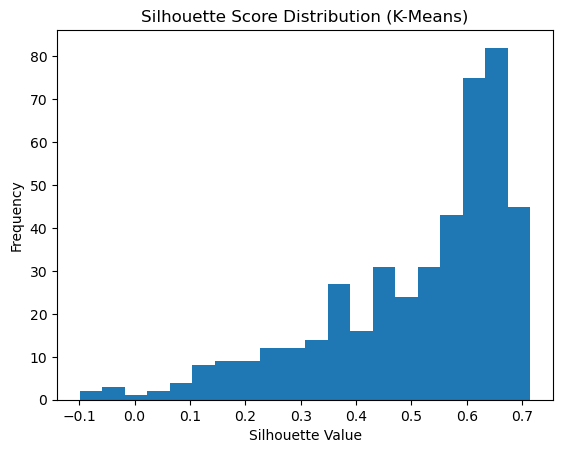

In [68]:
from sklearn.metrics import silhouette_samples

sample_scores = silhouette_samples(
    scaled_data,
    data["KMeans_Cluster"]
)

plt.hist(sample_scores, bins=20)
plt.title("Silhouette Score Distribution (K-Means)")
plt.xlabel("Silhouette Value")
plt.ylabel("Frequency")
plt.show()

We see that:
- Most scores are positive
- Large mass between 0.5 and 0.7
- Few near zero
- Very few slightly negative

Both K-Means (0.51) and Hierarchical Clustering (0.51) achieved similar silhouette scores, indicating moderate-to-strong cluster structure. The distribution of silhouette values shows that most observations are well embedded within their clusters, while a smaller portion lies near cluster boundaries. The near-identical performance across methods confirms that the dataset’s structure is variance-driven and robust to algorithm choice.

## 9: Conclusion

This project explored clustering through a structured, geometry-first approach using a synthetic behavioral dataset. Rather than treating clustering as a black-box technique, the analysis focused on understanding how distance, scaling, and algorithmic assumptions shape outcomes.

After generating multi-dimensional behavioral features, the data was standardized to ensure that distance-based methods operated fairly across variables. Both K-Means and Hierarchical Clustering (Ward linkage) were then applied to uncover latent group structure.

Across all analyses, several key findings emerged:

- The dataset contains three meaningful behavioral archetypes:

    - A cautious, low-risk, slow-decision group

    - An impulsive, high-risk, fast-decision group

    - A moderate, transitional group

- The dendrogram revealed clear structural separation, supporting a three-cluster solution without relying solely on heuristics.

- K-Means and Hierarchical clustering produced nearly identical assignments, demonstrating strong agreement between centroid-based and variance-minimizing approaches.

- Silhouette scores (~0.51 for both methods) indicated moderate-to-strong cluster structure, with most points well embedded within their assigned clusters and only minor boundary ambiguity.

Taken together, these results suggest that the underlying structure of the dataset is compact, variance-driven, and well-suited to spherical clustering assumptions.

However, this project also highlights an important modeling principle:

Clustering does not discover objective truth — it reveals structure under specific geometric assumptions.

Because this dataset was intentionally designed with compact behavioral archetypes, both algorithms successfully recovered the embedded structure. In real-world data, where clusters may be irregular, overlapping, or unequal in density, different methods could yield substantially different results.